All rows of the loaded data:
                 Date          Open          High           Low         Close  \
Date                                                                            
2022-02-01 2022-02-01  38481.765625  39115.132813  38113.664063  38743.273438   
2022-02-02 2022-02-02  38743.714844  38834.617188  36832.730469  36952.984375   
2022-02-03 2022-02-03  36944.804688  37154.601563  36375.539063  37154.601563   
2022-02-04 2022-02-04  37149.265625  41527.785156  37093.628906  41500.875000   
2022-02-05 2022-02-05  41501.480469  41847.164063  41038.097656  41441.164063   
...               ...           ...           ...           ...           ...   
2023-01-28 2023-01-28  23079.964844  23165.896484  22908.845703  23031.089844   
2023-01-29 2023-01-29  23031.449219  23919.890625  22985.070313  23774.566406   
2023-01-30 2023-01-30  23774.648438  23789.347656  22657.582031  22840.138672   
2023-01-31 2023-01-31           NaN           NaN           NaN           NaN   

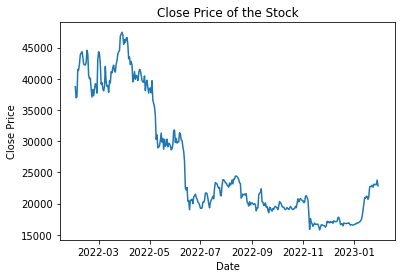

Epoch 1/100
9/9 [==============================] - 1s 3ms/step - loss: nan - accuracy: 0.0000e+00
Epoch 2/100
9/9 [==============================] - 0s 2ms/step - loss: nan - accuracy: 0.0000e+00
Epoch 3/100
9/9 [==============================] - 0s 2ms/step - loss: nan - accuracy: 0.0000e+00
Epoch 4/100
9/9 [==============================] - 0s 2ms/step - loss: nan - accuracy: 0.0000e+00
Epoch 5/100
9/9 [==============================] - 0s 2ms/step - loss: nan - accuracy: 0.0000e+00
Epoch 6/100
9/9 [==============================] - 0s 2ms/step - loss: nan - accuracy: 0.0000e+00
Epoch 7/100
9/9 [==============================] - 0s 2ms/step - loss: nan - accuracy: 0.0000e+00
Epoch 8/100
9/9 [==============================] - 0s 2ms/step - loss: nan - accuracy: 0.0000e+00
Epoch 9/100
9/9 [==============================] - 0s 2ms/step - loss: nan - accuracy: 0.0000e+00
Epoch 10/100
9/9 [==============================] - 0s 2ms/step - loss: nan - accuracy: 0.0000e+00
Epoch 11/100
9/9 [=

C:\Users\Your Name\AppData\Local\Temp\ipykernel_3200\4151007603.py:78: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  testing_data.loc[:, "Signal"] = model.predict(testing_data[["Close", "50_day_ma", "200_day_ma"]])
C:\Users\Your Name\AppData\Local\Temp\ipykernel_3200\4151007603.py:79: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  testing_data.loc[:, "Signal"] = np.where(testing_data["Signal"] > 0.5, 1, -1)


Accuracy: 100.00%


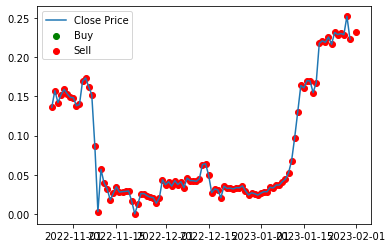

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense
from tkinter import Tk
from tkinter.filedialog import askopenfilename


# Open a file selection dialog
Tk().withdraw()
filename = askopenfilename()

# Load the selected file into a pandas dataframe
df = pd.read_csv(filename)

# Convert the date column to datetime
df['Date'] = pd.to_datetime(df['Date'])

# Set the date column as the index of the dataframe
df = df.set_index(df['Date'])

# Print all the rows of the loaded data
print("All rows of the loaded data:")
print(df)

# Print the shape of the dataframe
print("\nData shape:")
print(df.shape)

# Print the column names
print("\nData columns:")
print(df.columns)

# Convert the date column to datetime
df['Date'] = pd.to_datetime(df['Date'])

# Plot the close price
plt.plot(df['Close'])
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.title('Close Price of the Stock')
plt.show()

# Set the date column as the index of the dataframe
df = df.set_index(df['Date'])

# Calculate the 50-day and 200-day moving averages
df["50_day_ma"] = df["Close"].rolling(window=50).mean()
df["200_day_ma"] = df["Close"].rolling(window=200).mean()

# Generate the trading signals
df["Position"] = np.where(df["50_day_ma"] > df["200_day_ma"], 1, -1)
df["Position"] = df["Position"].shift(1)

# Pre-process the data
scaler = MinMaxScaler()
df[["Close", "50_day_ma", "200_day_ma"]] = scaler.fit_transform(df[["Close", "50_day_ma", "200_day_ma"]])

# Split the data into training and testing sets
training_data = df[:-100]
testing_data = df[-100:]

# Define the neural network model
model = Sequential()
model.add(Dense(units=32, activation='relu', input_dim=3))
model.add(Dense(units=16, activation='relu'))
model.add(Dense(units=1, activation='sigmoid'))

# Compile the model
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# Train the model
model.fit(training_data[["Close", "50_day_ma", "200_day_ma"]], training_data["Position"], epochs=100, batch_size=32)

# Generate the trading signals using the model
testing_data.loc[:, "Signal"] = model.predict(testing_data[["Close", "50_day_ma", "200_day_ma"]])
testing_data.loc[:, "Signal"] = np.where(testing_data["Signal"] > 0.5, 1, -1)

# Calculate the accuracy percentile
accuracy = (testing_data["Signal"] == testing_data["Position"]).mean()
print("Accuracy: {:.2f}%".format(accuracy * 100))

# Create the plot
fig, ax = plt.subplots()
ax.plot(testing_data['Close'], label='Close Price')

# Add the scatter plot for the Buy signals
buy = testing_data[testing_data['Signal'] == 1]
ax.scatter(buy.index, buy['Close'], color='green', label='Buy')

# Add the scatter plot for the Sell signals
sell = testing_data[testing_data['Signal'] == -1]
ax.scatter(sell.index, sell['Close'], color='red', label='Sell')

# Add the legend and show the plot
ax.legend()
plt.show()
